In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
import pandas as pd

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)
print(df.head())

   data_year county_name   offense_name
0       2013    New York  Larceny/Theft
1       2013    New York  Larceny/Theft
2       2013    New York  Larceny/Theft
3       2013    New York  Larceny/Theft
4       2013    New York  Larceny/Theft


In [3]:
crime_by_year = df[df["offense_name"] == "Larceny/Theft"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year.set_index("data_year", inplace=True)
print(crime_by_year.head()) 

           crime_count
data_year             
2013             82051
2014             85848
2015             93457
2016             95169
2017             98148


In [4]:
print(crime_by_year.head())
print(crime_by_year.index)
print(crime_by_year.dtypes)


           crime_count
data_year             
2013             82051
2014             85848
2015             93457
2016             95169
2017             98148
Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64', name='data_year')
crime_count    int64
dtype: object


In [5]:
crime_by_year = crime_by_year.reset_index()
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
print(crime_by_year.head())
print(crime_by_year.index)
print(crime_by_year.dtypes)

            crime_count
data_year              
2013-01-01        82051
2014-01-01        85848
2015-01-01        93457
2016-01-01        95169
2017-01-01        98148
DatetimeIndex(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-01', '2023-01-01'],
              dtype='datetime64[ns]', name='data_year', freq='AS-JAN')
crime_count    int64
dtype: object


In [6]:
plot_pacf(crime_by_year["crime_count"], lags=4)
plt.show()


NameError: name 'plot_pacf' is not defined

In [7]:
!pip install pmdarima


In [8]:
import pmdarima as pm
best_model = pm.auto_arima(crime_by_year, seasonal=True, stepwise=True, trace=True)
print(best_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=251.902, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=239.942, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=288.670, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=235.466, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=234.361, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=235.941, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.487 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. O

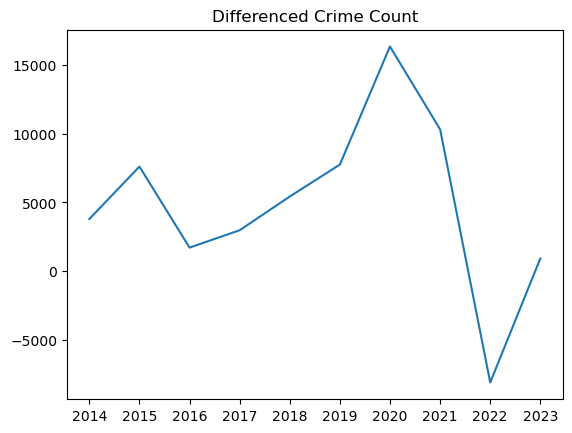

In [9]:
import matplotlib.pyplot as plt
plt.plot(crime_by_year.diff().dropna())
plt.title("Differenced Crime Count")
plt.show()


C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


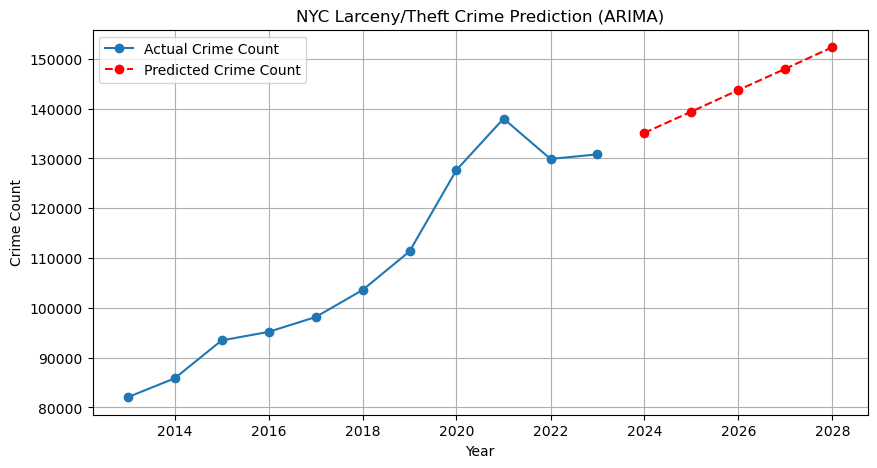

(13340.411816827855,
 13341.924742292826,
 2024-01-01    135131.508105
 2025-01-01    139405.725498
 2026-01-01    143727.052652
 2027-01-01    148001.442903
 2028-01-01    152322.590433
 Freq: AS-JAN, Name: predicted_mean, dtype: float64)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)

crime_by_year = df[df["offense_name"] == "Larceny/Theft"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
p, d, q = 2, 1, 2

model = ARIMA(crime_by_year['crime_count'], order=(p, d, q))
arima_result = model.fit()

aic = arima_result.aic
bic = arima_result.bic
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(crime_by_year.index, crime_by_year['crime_count'], label="Actual Crime Count", marker='o', linestyle='-')
plt.plot(pd.date_range(crime_by_year.index[-1], periods=forecast_steps+1, freq='AS')[1:], forecast, 
         label="Predicted Crime Count", marker='o', linestyle='dashed', color='red')
plt.title("NYC Larceny/Theft Crime Prediction (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid()
plt.show()

aic, bic, forecast

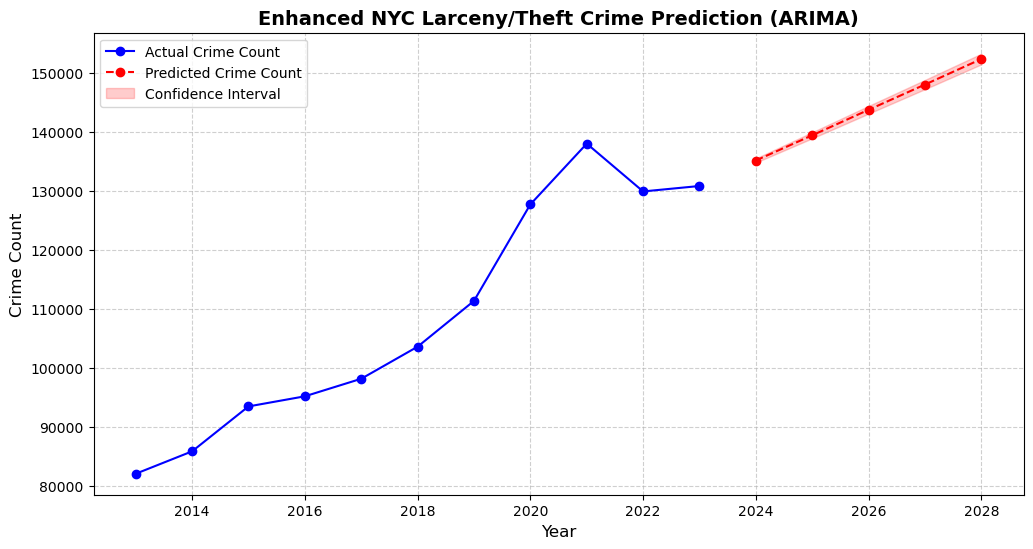

In [11]:
forecast = arima_result.get_forecast(steps=5)
values_pred = forecast.predicted_mean 
years_pred = values_pred.index 
years_actual = crime_by_year.index
values_actual = crime_by_year["crime_count"]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(years_actual, values_actual, marker='o', linestyle='-', color='blue', label="Actual Crime Count")
plt.plot(years_pred, values_pred, marker='o', linestyle='--', color='red', label="Predicted Crime Count")
conf_int = forecast.conf_int()
plt.fill_between(years_pred, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label="Confidence Interval")
plt.title("Enhanced NYC Larceny/Theft Crime Prediction (ARIMA)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


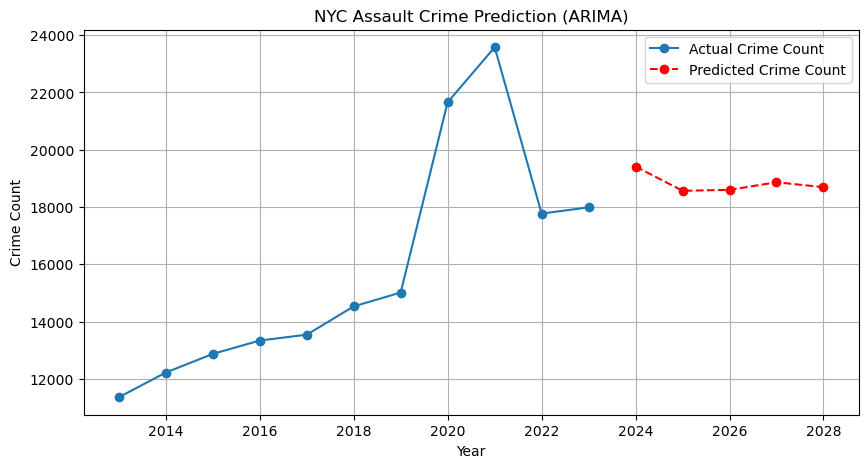

(2572.670139763067,
 2574.183065228037,
 2024-01-01    19414.984873
 2025-01-01    18567.130499
 2026-01-01    18599.545358
 2027-01-01    18865.502119
 2028-01-01    18693.764031
 Freq: AS-JAN, Name: predicted_mean, dtype: float64)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)

crime_by_year = df[df["offense_name"] == "Assault"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
p, d, q = 2, 1, 2

model = ARIMA(crime_by_year['crime_count'], order=(p, d, q))
arima_result = model.fit()

aic = arima_result.aic
bic = arima_result.bic
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(crime_by_year.index, crime_by_year['crime_count'], label="Actual Crime Count", marker='o', linestyle='-')
plt.plot(pd.date_range(crime_by_year.index[-1], periods=forecast_steps+1, freq='AS')[1:], forecast, 
         label="Predicted Crime Count", marker='o', linestyle='dashed', color='red')
plt.title("NYC Assault Crime Prediction (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid()
plt.show()

aic, bic, forecast

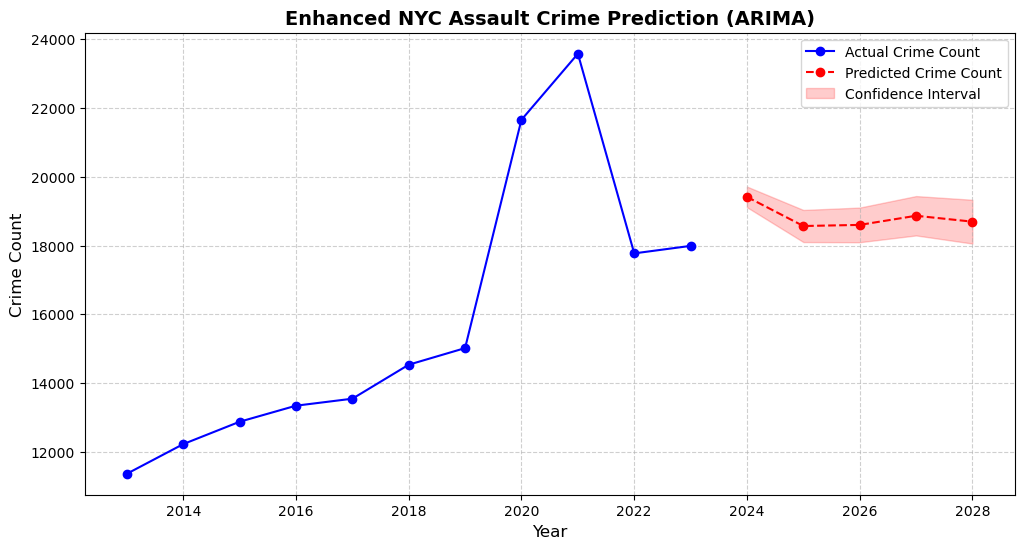

In [13]:
forecast = arima_result.get_forecast(steps=5)
values_pred = forecast.predicted_mean 
years_pred = values_pred.index 
years_actual = crime_by_year.index
values_actual = crime_by_year["crime_count"]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(years_actual, values_actual, marker='o', linestyle='-', color='blue', label="Actual Crime Count")
plt.plot(years_pred, values_pred, marker='o', linestyle='--', color='red', label="Predicted Crime Count")
conf_int = forecast.conf_int()
plt.fill_between(years_pred, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label="Confidence Interval")
plt.title("Enhanced NYC Assault Crime Prediction (ARIMA)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


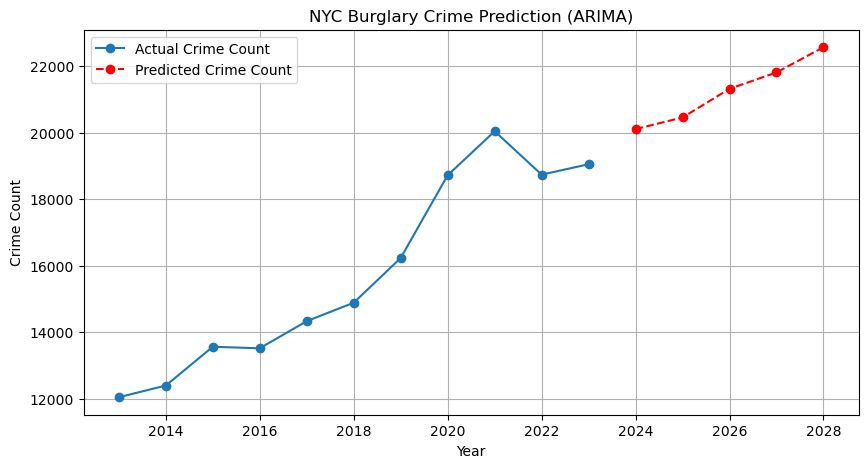

(551.805913246297,
 553.3188387112672,
 2024-01-01    20102.542575
 2025-01-01    20453.061137
 2026-01-01    21312.961294
 2027-01-01    21804.644842
 2028-01-01    22562.313916
 Freq: AS-JAN, Name: predicted_mean, dtype: float64)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)

crime_by_year = df[df["offense_name"] == "Burglary"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
p, d, q = 2, 1, 2

model = ARIMA(crime_by_year['crime_count'], order=(p, d, q))
arima_result = model.fit()

aic = arima_result.aic
bic = arima_result.bic
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(crime_by_year.index, crime_by_year['crime_count'], label="Actual Crime Count", marker='o', linestyle='-')
plt.plot(pd.date_range(crime_by_year.index[-1], periods=forecast_steps+1, freq='AS')[1:], forecast, 
         label="Predicted Crime Count", marker='o', linestyle='dashed', color='red')
plt.title("NYC Burglary Crime Prediction (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid()
plt.show()

aic, bic, forecast

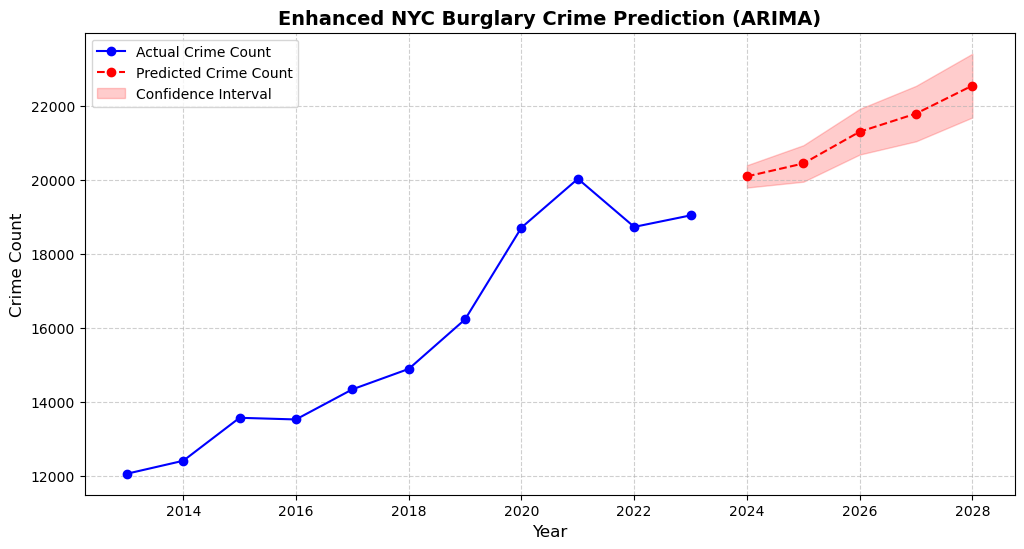

In [15]:
forecast = arima_result.get_forecast(steps=5)
values_pred = forecast.predicted_mean 
years_pred = values_pred.index 
years_actual = crime_by_year.index
values_actual = crime_by_year["crime_count"]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(years_actual, values_actual, marker='o', linestyle='-', color='blue', label="Actual Crime Count")
plt.plot(years_pred, values_pred, marker='o', linestyle='--', color='red', label="Predicted Crime Count")
conf_int = forecast.conf_int()
plt.fill_between(years_pred, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label="Confidence Interval")
plt.title("Enhanced NYC Burglary Crime Prediction (ARIMA)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


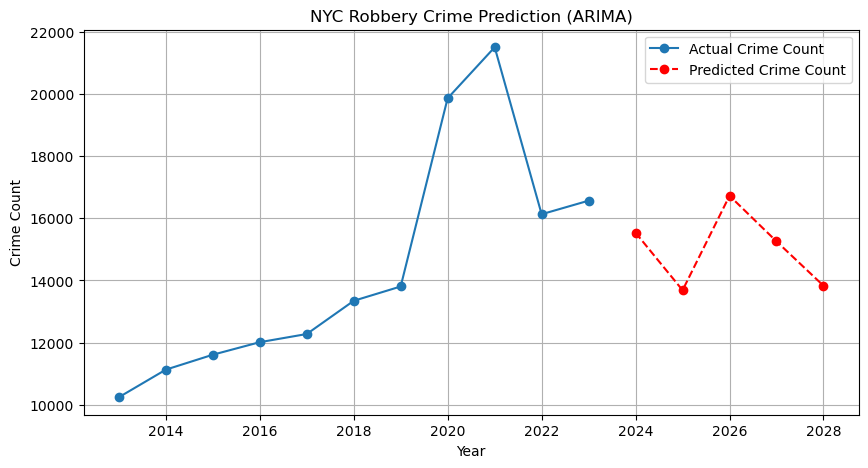

(1823.8893901137556,
 1825.4023155787258,
 2024-01-01    15535.665763
 2025-01-01    13686.904381
 2026-01-01    16721.900429
 2027-01-01    15256.972409
 2028-01-01    13833.223426
 Freq: AS-JAN, Name: predicted_mean, dtype: float64)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)

crime_by_year = df[df["offense_name"] == "Robbery"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
p, d, q = 2, 1, 2

model = ARIMA(crime_by_year['crime_count'], order=(p, d, q))
arima_result = model.fit()

aic = arima_result.aic
bic = arima_result.bic
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(crime_by_year.index, crime_by_year['crime_count'], label="Actual Crime Count", marker='o', linestyle='-')
plt.plot(pd.date_range(crime_by_year.index[-1], periods=forecast_steps+1, freq='AS')[1:], forecast, 
         label="Predicted Crime Count", marker='o', linestyle='dashed', color='red')
plt.title("NYC Robbery Crime Prediction (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid()
plt.show()

aic, bic, forecast

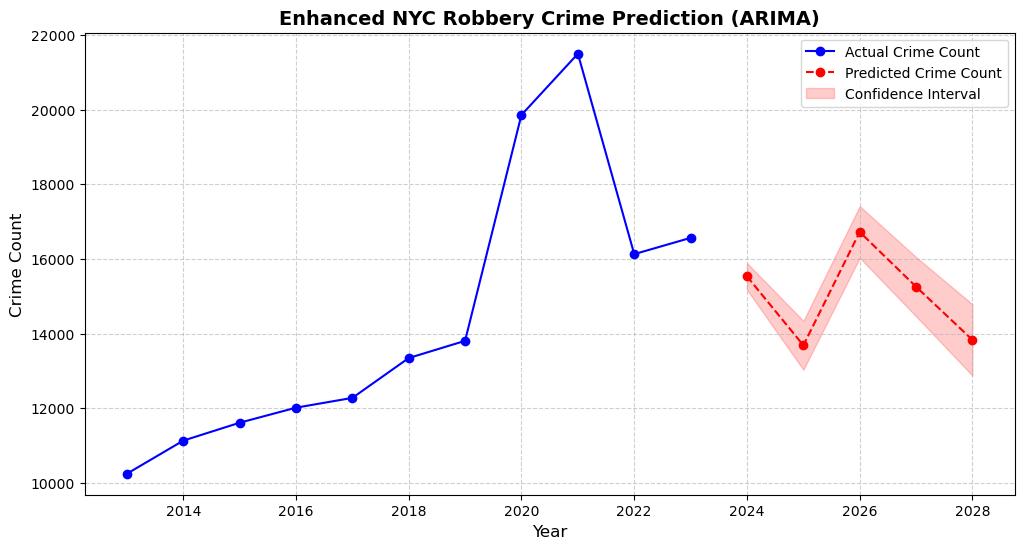

In [17]:
forecast = arima_result.get_forecast(steps=5)
values_pred = forecast.predicted_mean 
years_pred = values_pred.index 
years_actual = crime_by_year.index
values_actual = crime_by_year["crime_count"]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(years_actual, values_actual, marker='o', linestyle='-', color='blue', label="Actual Crime Count")
plt.plot(years_pred, values_pred, marker='o', linestyle='--', color='red', label="Predicted Crime Count")
conf_int = forecast.conf_int()
plt.fill_between(years_pred, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label="Confidence Interval")
plt.title("Enhanced NYC Robbery Crime Prediction (ARIMA)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


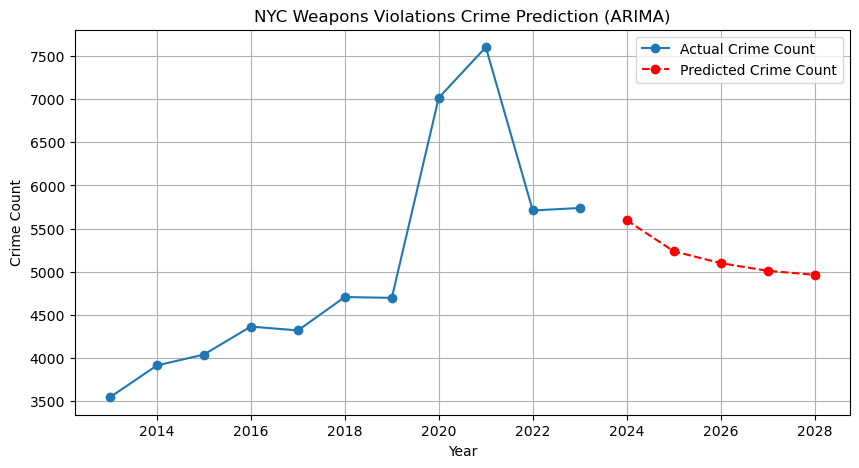

(2713.194801062506,
 2714.707726527476,
 2024-01-01    5597.903779
 2025-01-01    5237.742594
 2026-01-01    5100.528985
 2027-01-01    5011.582179
 2028-01-01    4965.443759
 Freq: AS-JAN, Name: predicted_mean, dtype: float64)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)

crime_by_year = df[df["offense_name"] == "Weapons Violations"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
p, d, q = 2, 1, 2

model = ARIMA(crime_by_year['crime_count'], order=(p, d, q))
arima_result = model.fit()

aic = arima_result.aic
bic = arima_result.bic
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(crime_by_year.index, crime_by_year['crime_count'], label="Actual Crime Count", marker='o', linestyle='-')
plt.plot(pd.date_range(crime_by_year.index[-1], periods=forecast_steps+1, freq='AS')[1:], forecast, 
         label="Predicted Crime Count", marker='o', linestyle='dashed', color='red')
plt.title("NYC Weapons Violations Crime Prediction (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid()
plt.show()

aic, bic, forecast

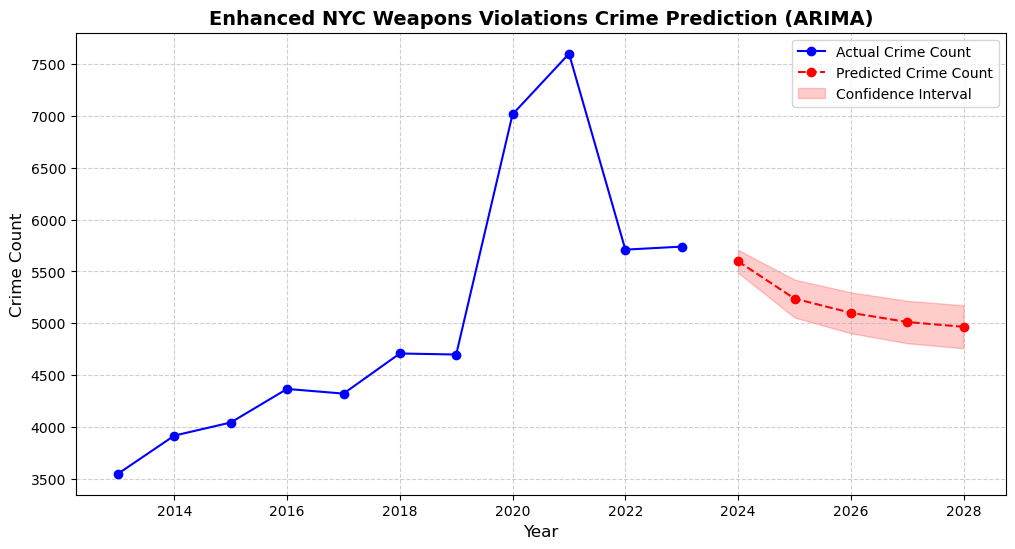

In [19]:
forecast = arima_result.get_forecast(steps=5)
values_pred = forecast.predicted_mean 
years_pred = values_pred.index 
years_actual = crime_by_year.index
values_actual = crime_by_year["crime_count"]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(years_actual, values_actual, marker='o', linestyle='-', color='blue', label="Actual Crime Count")
plt.plot(years_pred, values_pred, marker='o', linestyle='--', color='red', label="Predicted Crime Count")
conf_int = forecast.conf_int()
plt.fill_between(years_pred, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label="Confidence Interval")
plt.title("Enhanced NYC Weapons Violations Crime Prediction (ARIMA)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


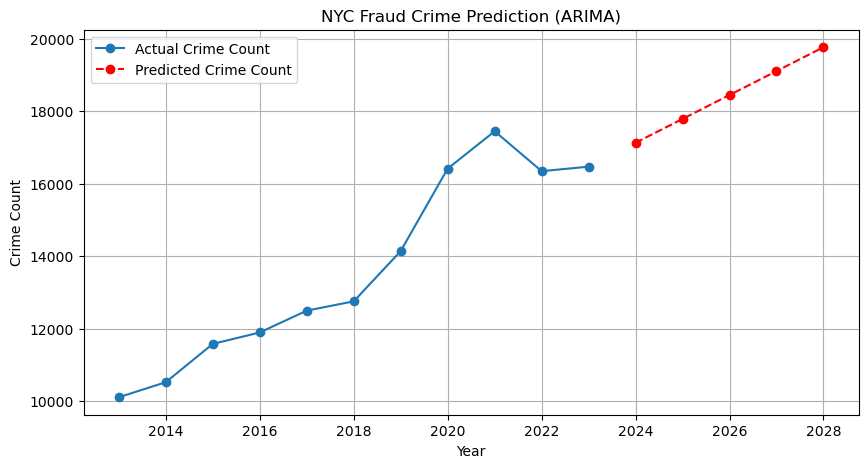

(349.8618791842525,
 351.3748046492227,
 2024-01-01    17131.862853
 2025-01-01    17790.843868
 2026-01-01    18450.706132
 2027-01-01    19109.687214
 2028-01-01    19769.548888
 Freq: AS-JAN, Name: predicted_mean, dtype: float64)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)

crime_by_year = df[df["offense_name"] == "Fraud"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
p, d, q = 2, 1, 2

model = ARIMA(crime_by_year['crime_count'], order=(p, d, q))
arima_result = model.fit()

aic = arima_result.aic
bic = arima_result.bic
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(crime_by_year.index, crime_by_year['crime_count'], label="Actual Crime Count", marker='o', linestyle='-')
plt.plot(pd.date_range(crime_by_year.index[-1], periods=forecast_steps+1, freq='AS')[1:], forecast, 
         label="Predicted Crime Count", marker='o', linestyle='dashed', color='red')
plt.title("NYC Fraud Crime Prediction (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid()
plt.show()

aic, bic, forecast

C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ethan\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


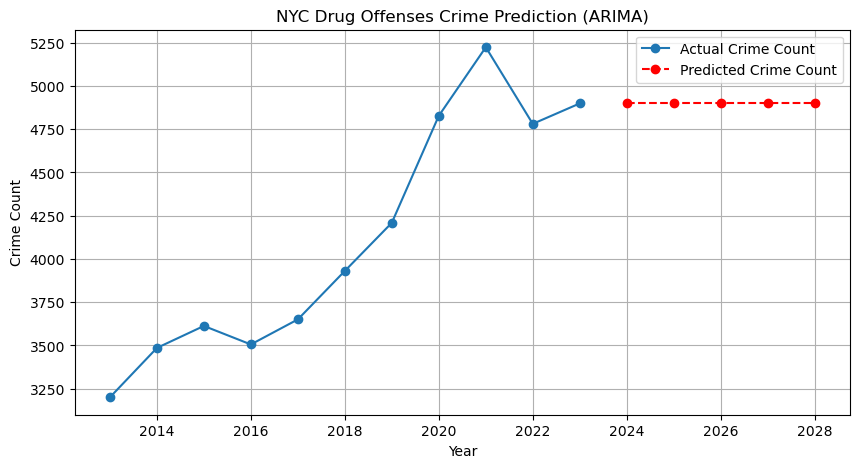

(6843451748.884376,
 6843451750.397301,
 2024-01-01    4898.999993
 2025-01-01    4899.000029
 2026-01-01    4899.000029
 2027-01-01    4899.000029
 2028-01-01    4899.000029
 Freq: AS-JAN, Name: predicted_mean, dtype: float64)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "NYC_Crime_Data.csv"
df = pd.read_csv(file_path)

crime_by_year = df[df["offense_name"] == "Drug Offenses"].groupby("data_year").size().reset_index(name="crime_count")
crime_by_year["data_year"] = pd.to_datetime(crime_by_year["data_year"], format='%Y')
crime_by_year.set_index("data_year", inplace=True)
crime_by_year = crime_by_year.asfreq('AS')
p, d, q = 2, 1, 2

model = ARIMA(crime_by_year['crime_count'], order=(p, d, q))
arima_result = model.fit()

aic = arima_result.aic
bic = arima_result.bic
forecast_steps = 5
forecast = arima_result.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(crime_by_year.index, crime_by_year['crime_count'], label="Actual Crime Count", marker='o', linestyle='-')
plt.plot(pd.date_range(crime_by_year.index[-1], periods=forecast_steps+1, freq='AS')[1:], forecast, 
         label="Predicted Crime Count", marker='o', linestyle='dashed', color='red')
plt.title("NYC Drug Offenses Crime Prediction (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.legend()
plt.grid()
plt.show()

aic, bic, forecast